In [2]:
import os

os.getcwd()

'c:\\Users\\mogarcia\\OneDrive\\Escritorio\\MCD-ITAM\\CDAS\\Pasteur'

In [3]:
os.chdir('C:/Users/mogarcia/OneDrive/Escritorio/MCD-ITAM/CDAS/Pasteur')

In [4]:
#Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import string
import re
from nltk.corpus import stopwords
import nltk
import random
import demoji
from unidecode import unidecode


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style

In [5]:
# Primero especificamos un patrón del archivo y lo pasamos como parámetro en la función glob
import glob

csv_files = glob.glob('*.csv')
# Mostrar el archivo csv_files, el cual es una lista de nombres
print(csv_files)

['2021-10-27-14-29-24-CDT-search-csv-export.csv', '2021-11-03-21-39-52-CST-search-csv-export.csv']


In [6]:
list_data = []

for filename in csv_files:
    data = pd.read_csv(filename, delimiter = '\t')
    list_data.append(data)

C:\Users\mogarcia\AppData\Local\R-MINI~1\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (37,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\mogarcia\AppData\Local\R-MINI~1\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
base = pd.concat(list_data)
base.head(5)

Page Name              User Name       Facebook Id  \
0     Guanajuato Sur Noticias          GuanajuatoSur   116533631798431   
1  Digital Noticias Michoacán    DigitalNoticiasMich   100044645704478   
2         Campeche Digital Mx         CampeDigitalMx   166788413383635   
3         Noticieros Televisa  NoticierosTelevisacom   105624182802445   
4             Agencia Chiapas         AgenciaChiapas  1179249828824480   

        Page Category Page Admin Top Country  \
0               MEDIA                     MX   
1  MEDIA_NEWS_COMPANY                     MX   
2           COMMUNITY                     MX   
3  MEDIA_NEWS_COMPANY                     MX   
4  MEDIA_NEWS_COMPANY                     MX   

                                    Page Description         Page Created  \
0  Noticias y Reportajes de la Zona Sur del Estad...  2011-12-26 18:16:08   
1                                Portal informativo   2017-01-23 04:48:04   
2  Se dedica a investigar las implicaciones cultu...  2011-06-06 02:31:22   
3   Para entender la noticia. \nNoticieros Televisa.  2010-03-26 01:07:29   
4  Compartimos tus denuncias y luchamos contra la...  2016-08-06 22:34:08   

   Likes at Posting  Followers at Posting             Post Created  ...  \
0          150319.0              216905.0  2021-10-27 14:11:53 CDT  ...   
1           50665.0               58595.0  2021-10-27 14:10:17 CDT  ...   
2           12930.0               13867.0  2021-10-27 14:09:50 CDT  ...   
3         8267499.0            12495903.0  2021-10-27 14:09:04 CDT  ...   
4           13684.0               14440.0  2021-10-27 14:06:11 CDT  ...   

                                             Message  \
0  #SALVATIERRA https://www.facebook.com/69082778...   
1  En Noviembre vacunarán con Cansino a 300 mil r...   
2  PARTICIPARÁ IMSS CAMPECHE EN DÉCIMA JORNADA NA...   
3  La jornada de vacunación se realiza en 11 muni...   
4  Información importante sobre la vacunación a m...   

                                                Link Final Link  \
0  https://www.facebook.com/comunicacionsalvatier...        NaN   
1  https://www.facebook.com/photo.php?fbid=418194...        NaN   
2  https://www.facebook.com/CampeDigitalMx/photos...        NaN   
3  https://noticieros.televisa.com/videos/arranca...        NaN   
4  https://www.facebook.com/AgenciaChiapas/photos...        NaN   

                                          Image Text  \
0  ¡QUE NO SE TE PASE VACUNARTE! De 18 años en ad...   
1               0 290 Gobierno de michoacan.g RABAJO   
2                                                NaN   
3                                                NaN   
4  ¿Quieres vacunarte? Este jueves 28 y viernes 2...   

                                           Link Text  \
0                           Comunicación Salvatierra   
1      Photos from Digital Noticias Michoacán's post   
2             Photos from Campeche Digital Mx's post   
3  Arranca vacunación para menores de edad con co...   
4                                                NaN   

                                         Description  Sponsor Id  \
0  ¿No te has vacunado? Aún tienes oportunidad.\n...         NaN   
1                                                NaN         NaN   
2                                                NaN         NaN   
3  Este miércoles 27 de octubre arrancó la vacuna...         NaN   
4                                                NaN         NaN   

   Sponsor Name  Sponsor Category  \
0           NaN               NaN   
1           NaN               NaN   
2           NaN               NaN   
3           NaN               NaN   
4           NaN               NaN   

   Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )  
0                                                -26                                                                   
1                                              -0.88                                  

In [8]:
#Se eliminan duplicados
df = base.drop_duplicates()

In [9]:
# número de observaciones del dataframe
df.shape[0]

599998

In [10]:
#se eliman los registros nulos de la variable "Message"
df = df.dropna(how='any', subset=['Message']).reset_index(drop=True)

In [11]:
df.shape[0]

540786

In [12]:
def limpieza(Message):
    #Unidecode toma un objeto de cadena, que posiblemente contenga caracteres no ASCII, y devuelve una cadena que se puede 
#codificar de forma segura en ASCII. En este caso se utilizó para remover acentos y emojis
    Message = unidecode(Message)
#Minúsculas
    Message = Message.lower()
#Eliminar HashTags
    Message = re.sub("#[A-Za-z0-9_]+","", Message)
#Eliminar hipervínculos
    Message = re.sub(r'http\S+', '', Message)
#Eliminar signos de interrogación, exclamación y otros
    Message = re.sub(r'[^\w\s]', '', Message)
#----------------------
    return Message

In [13]:
nuevo_mensaje=[]
for i in df.Message:
    nm=limpieza(i)
    nuevo_mensaje.append(nm)

In [14]:
df["Nuevo_Mensaje"]=nuevo_mensaje

In [15]:
df.loc[:,['Message','Nuevo_Mensaje']]

Message  \
0       #SALVATIERRA https://www.facebook.com/69082778...   
1       En Noviembre vacunarán con Cansino a 300 mil r...   
2       PARTICIPARÁ IMSS CAMPECHE EN DÉCIMA JORNADA NA...   
3       La jornada de vacunación se realiza en 11 muni...   
4       Información importante sobre la vacunación a m...   
...                                                   ...   
540781  #Nacional Hugo López-Gatell descartó suspender...   
540782  El creador de Microsoft espera que en próximos...   
540783  AYUDEMOS A CAMBIAR VIDAS!!❤️🐶🐶🐶❤️ -Tengo 3 per...   
540784  #PorSiTeLoPerdiste 🗣️💉 l Al informar 94 nuevos...   
540785  #Salud | 🦠😷🍺 ¡Ya valió, raza!, Next. ¿Qué ocur...   

                                            Nuevo_Mensaje  
0                                                          
1       en noviembre vacunaran con cansino a 300 mil r...  
2       participara imss campeche en decima jornada na...  
3       la jornada de vacunacion se realiza en 11 muni...  
4       informacion importante sobre la vacunacion a m...  
...                                                   ...  
540781   hugo lopezgatell descarto suspender la vacuna...  
540782  el creador de microsoft espera que en proximos...  
540783  ayudemos a cambiar vidas tengo 3 perritos resc...  
540784    l al informar 94 nuevos contagios y cuatro f...  
540785     ya valio raza next que ocurre en el cuerpo ...  

[540786 rows x 2 columns]

# TSNE

In [16]:
datos=df.sample(n=10000)

In [17]:
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

np.random.seed(19680801)
cvec = CountVectorizer(stop_words=stopwords.words('spanish')).fit(datos['Nuevo_Mensaje'])
bow = 1*(cvec.transform(datos['Nuevo_Mensaje'])>0)

C:\Users\mogarcia\AppData\Local\R-MINI~1\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


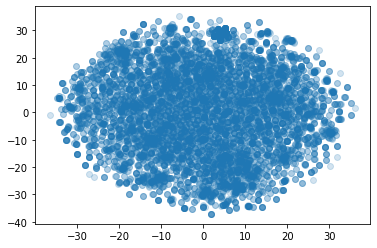

In [18]:
tsne = TSNE(n_components=2, metric='cosine', square_distances=True, perplexity=5, learning_rate=10)
tsne.fit(bow)

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1], alpha=0.2)

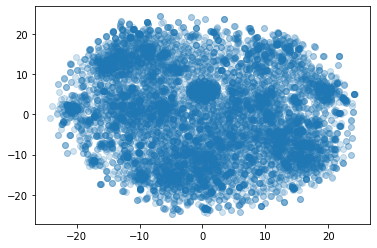

In [19]:
tsne = TSNE(n_components=2, metric='cosine', square_distances=True, perplexity=50, learning_rate=10)
tsne.fit(bow)

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1], alpha=0.2)

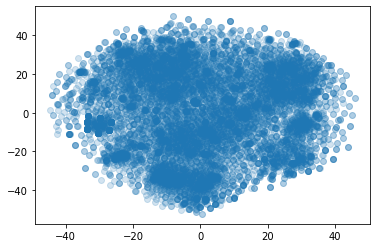

In [20]:
tsne = TSNE(n_components=2, metric='cosine', square_distances=True, perplexity=55, learning_rate=100)
tsne.fit(bow)

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1], alpha=0.2)

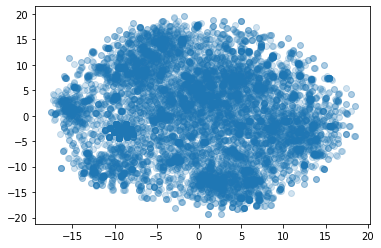

In [21]:
tsne = TSNE(n_components=2, metric='cosine', square_distances=True, perplexity=55, learning_rate=5)
tsne.fit(bow)

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1], alpha=0.2)

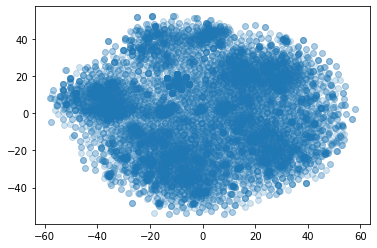

In [22]:
tsne = TSNE(n_components=2, metric='cosine', square_distances=True, perplexity=55, learning_rate='auto')
tsne.fit(bow)

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1], alpha=0.2)

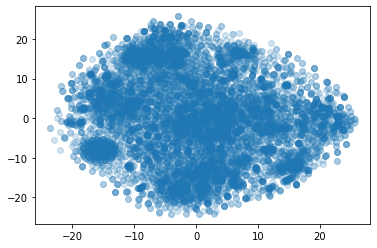

In [23]:
tsne = TSNE(n_components=2, metric='cosine', square_distances=True, perplexity=60, learning_rate=10)
tsne.fit(bow)

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1], alpha=0.2)

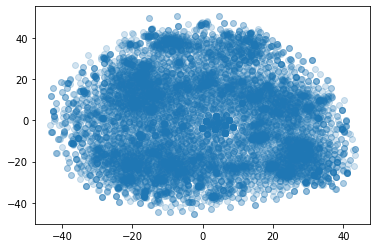

In [24]:
tsne = TSNE(n_components=2, metric='cosine', square_distances=True, perplexity=60, learning_rate=100)
tsne.fit(bow)

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1], alpha=0.2)

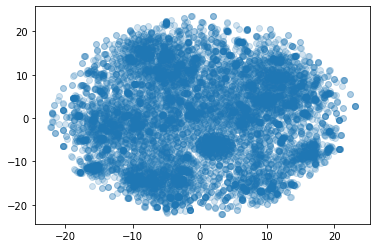

In [25]:
tsne = TSNE(n_components=2, metric='cosine', square_distances=True, perplexity=70, learning_rate=10)
tsne.fit(bow)

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1], alpha=0.2)

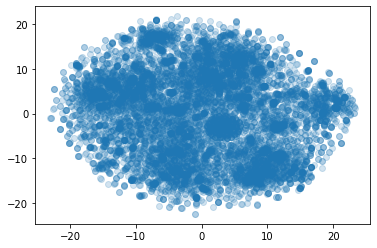

In [26]:
tsne = TSNE(n_components=2, metric='cosine', square_distances=True, perplexity=80, learning_rate=10)
tsne.fit(bow)

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1], alpha=0.2)

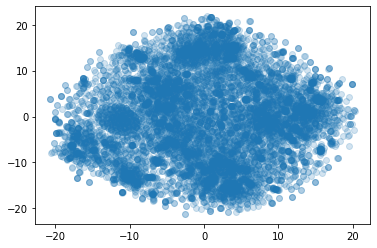

In [27]:
tsne = TSNE(n_components=2, metric='cosine', square_distances=True, perplexity=100, learning_rate=10)
tsne.fit(bow)

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1], alpha=0.2)

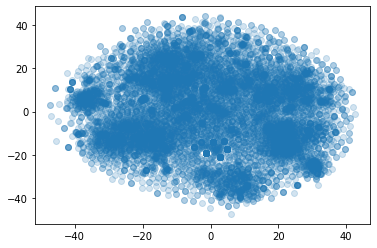

In [28]:
tsne = TSNE(n_components=2, metric='cosine', square_distances=True, perplexity=100, learning_rate=1000)
tsne.fit(bow)

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1], alpha=0.2)

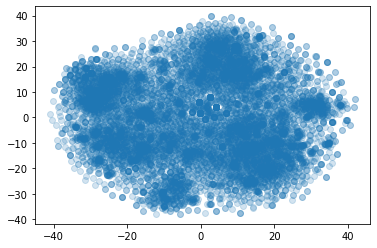

In [29]:
tsne = TSNE(n_components=2, metric='cosine', square_distances=True, perplexity=100, learning_rate='auto')
tsne.fit(bow)

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1], alpha=0.2)

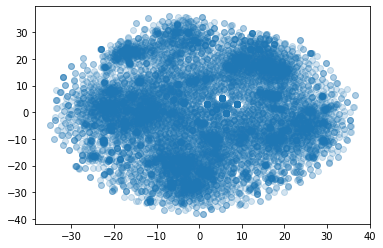

In [30]:
tsne = TSNE(n_components=2, metric='cosine', square_distances=True, perplexity=120, learning_rate='auto')
tsne.fit(bow)

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1], alpha=0.2)

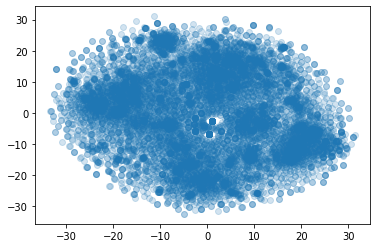

In [31]:
tsne = TSNE(n_components=2, metric='cosine', square_distances=True, perplexity=150, learning_rate='auto')
tsne.fit(bow)

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1], alpha=0.2)

## CLUSTERS - KMEAS

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer


#Definimos al TF-IDF Vectorizer Object, transforma las letras en ocurrencias. Quitamos todas las stopwords
tfidf = TfidfVectorizer(stop_words=stopwords.words('spanish'),encoding='ascii')

vectors = tfidf.fit_transform(datos['Nuevo_Mensaje'])

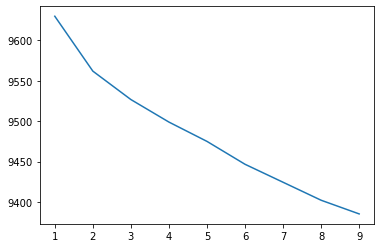

In [33]:
var = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(vectors)
    var.append(km.inertia_)
    
plt.plot(range(1, 10), var)
plt.show()

In [34]:
ts2=pd.DataFrame(tsne.fit_transform(bow),columns=['tsne1', 'tsne2'])

C:\Users\mogarcia\AppData\Local\R-MINI~1\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


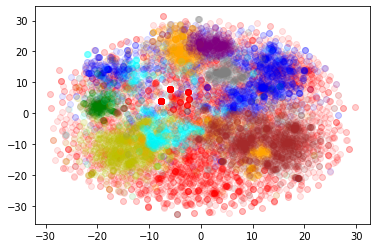

In [35]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)
colores = ['r', 'b', 'g', 'y', 'orange', 'cyan', 'purple', 'grey','orange','brown','darkgrey']
#colores = ['red', 'blue', 'black', 'yellow', 'green', 'cyan', 'purple','grey']
km.fit(vectors)

for i in range(10):
    plt.scatter(
        ts2[km.labels_ == i].tsne1,
        ts2[km.labels_ == i].tsne2,
        alpha=0.1, color=colores[i])
plt.show()

# HDBSCAN

In [36]:
from hdbscan import HDBSCAN

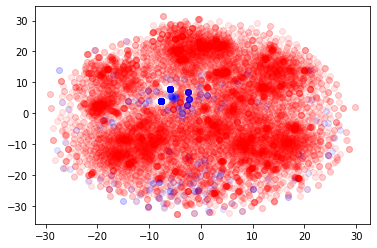

In [37]:
#colores=sns.color_palette("Spectral",100)
colores = ['red', 'blue', 'black', 'yellow', 'green', 'orange', 'blueviolet', 'darkgreen', 'gray']

hdb = HDBSCAN( min_cluster_size=100, min_samples=300, metric='cosine')

hdb_labs = hdb.fit_predict(vectors)

for i in np.unique(hdb_labs):
    plt.scatter(
        ts2[hdb_labs == i].tsne1,
        ts2[hdb_labs == i].tsne2,
        alpha=0.1, color=colores[i])
plt.show()

In [38]:
np.unique(hdb_labs)

array([-1,  0,  1], dtype=int64)